In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/which-resume-attributes-drive-job-callbacks/resume.csv


In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


### Importing dataset

In [57]:
data = pd.read_csv("/kaggle/input/which-resume-attributes-drive-job-callbacks/resume.csv")

data.head(10)

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high
5,386,Chicago,wholesale_and_retail_trade,sales_rep,0.0,1,private,0,0,0,...,1,0,6,0,1,0,0,0,0,low
6,386,Chicago,wholesale_and_retail_trade,sales_rep,0.0,1,private,0,0,0,...,0,1,5,1,1,1,0,0,1,high
7,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,0,21,1,1,1,0,1,1,high
8,386,Chicago,wholesale_and_retail_trade,sales_rep,0.0,1,private,0,0,0,...,0,0,3,1,1,0,0,0,0,low
9,386,Chicago,wholesale_and_retail_trade,sales_rep,0.0,1,private,0,0,0,...,0,1,6,0,1,1,0,0,1,high


###  Displaying the information about the DataFrame

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_ad_id               4870 non-null   int64  
 1   job_city                4870 non-null   object 
 2   job_industry            4870 non-null   object 
 3   job_type                4870 non-null   object 
 4   job_fed_contractor      3102 non-null   float64
 5   job_equal_opp_employer  4870 non-null   int64  
 6   job_ownership           4870 non-null   object 
 7   job_req_any             4870 non-null   int64  
 8   job_req_communication   4870 non-null   int64  
 9   job_req_education       4870 non-null   int64  
 10  job_req_min_experience  2124 non-null   object 
 11  job_req_computer        4870 non-null   int64  
 12  job_req_organization    4870 non-null   int64  
 13  job_req_school          4870 non-null   object 
 14  received_callback       4870 non-null   

In [59]:
print(data.describe())

         job_ad_id  job_fed_contractor  job_equal_opp_employer  job_req_any  \
count  4870.000000         3102.000000             4870.000000  4870.000000   
mean    651.777823            0.114765                0.291170     0.787269   
std     388.690698            0.318789                0.454349     0.409281   
min       1.000000            0.000000                0.000000     0.000000   
25%     306.250000            0.000000                0.000000     1.000000   
50%     647.000000            0.000000                0.000000     1.000000   
75%     979.750000            0.000000                1.000000     1.000000   
max    1344.000000            1.000000                1.000000     1.000000   

       job_req_communication  job_req_education  job_req_computer  \
count            4870.000000        4870.000000       4870.000000   
mean                0.124846           0.106776          0.437166   
std                 0.330578           0.308860          0.496087   
min         

### Obtaining the count of null values in each column

In [60]:
null_counts = data.isnull().sum()

print(null_counts)

job_ad_id                    0
job_city                     0
job_industry                 0
job_type                     0
job_fed_contractor        1768
job_equal_opp_employer       0
job_ownership                0
job_req_any                  0
job_req_communication        0
job_req_education            0
job_req_min_experience    2746
job_req_computer             0
job_req_organization         0
job_req_school               0
received_callback            0
firstname                    0
race                         0
gender                       0
years_college                0
college_degree               0
honors                       0
worked_during_school         0
years_experience             0
computer_skills              0
special_skills               0
volunteer                    0
military                     0
employment_holes             0
has_email_address            0
resume_quality               0
dtype: int64


In [61]:
data.shape

(4870, 30)

In [62]:
data = data.drop(["job_fed_contractor","job_req_min_experience"], axis=1)

In [63]:
data.dtypes

job_ad_id                  int64
job_city                  object
job_industry              object
job_type                  object
job_equal_opp_employer     int64
job_ownership             object
job_req_any                int64
job_req_communication      int64
job_req_education          int64
job_req_computer           int64
job_req_organization       int64
job_req_school            object
received_callback          int64
firstname                 object
race                      object
gender                    object
years_college              int64
college_degree             int64
honors                     int64
worked_during_school       int64
years_experience           int64
computer_skills            int64
special_skills             int64
volunteer                  int64
military                   int64
employment_holes           int64
has_email_address          int64
resume_quality            object
dtype: object

### Obtaining the unique values

In [64]:
jc_unique = data["job_city"].unique()
ji_unique = data["job_industry"].unique()
jt_unique = data["job_type"].unique()
jo_unique = data["job_ownership"].unique()
js_unique = data["job_req_school"].unique()
race_unique = data["race"].unique()
gender_unique = data["gender"].unique()
rq_unique = data["resume_quality"].unique()

### Mapping the categorical values to numerical values

In [65]:
jc_label = {
    'Chicago': 0,
    'Boston': 1}

# Convert string values to integer labels
data['job_city'] = data['job_city'].map(jc_label)

data['job_city']

######################################

ji_label = {
    'manufacturing': 0,
    'other_service': 1,
'wholesale_and_retail_trade':2,
'business_and_personal_service':3,
'finance_insurance_real_estate':4,
'transportation_communication':5,
}

# Convert string values to integer labels
data['job_industry'] = data['job_industry'].map(ji_label)

#########################################

jt_label = {
    'supervisor': 0,
    'secretary': 1,
'sales_rep':2,
'retail_sales':3,
'manager':4,
'clerical':5,
}

# Convert string values to integer labels
data['job_type'] = data['job_type'].map(jt_label)

########################################

jo_label = {
    'unknown': 0,
    'nonprofit': 1,
'private':2,
'public':3
}

# Convert string values to integer labels
data['job_ownership'] = data['job_ownership'].map(jo_label)


#########################################

js_label = {
    'none_listed': 0,
    'some_college': 1,
'college':2,
'high_school_grad':3
}

# Convert string values to integer labels
data['job_req_school'] = data['job_req_school'].map(js_label)


###########################################\

race_label = {
    'white': 0,
    'black': 1
}

# Convert string values to integer labels
data['race'] = data['race'].map(race_label)



#############################################

gender_label = {
    'f': 0,
    'm': 1
}

# Convert string values to integer labels
data['gender'] = data['gender'].map(gender_label)



################################################

resume_label = {
    'low': 0,
    'high': 1
}

# Convert string values to integer labels
data['resume_quality'] = data['resume_quality'].map(resume_label)



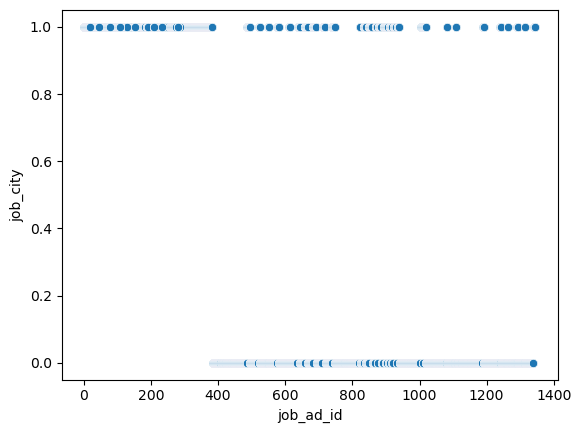

In [66]:
plt_scatter = sns.scatterplot(x=data['job_ad_id'], y=data['job_city'])

### Correlation Heatmap

<Figure size 1000x1000 with 0 Axes>

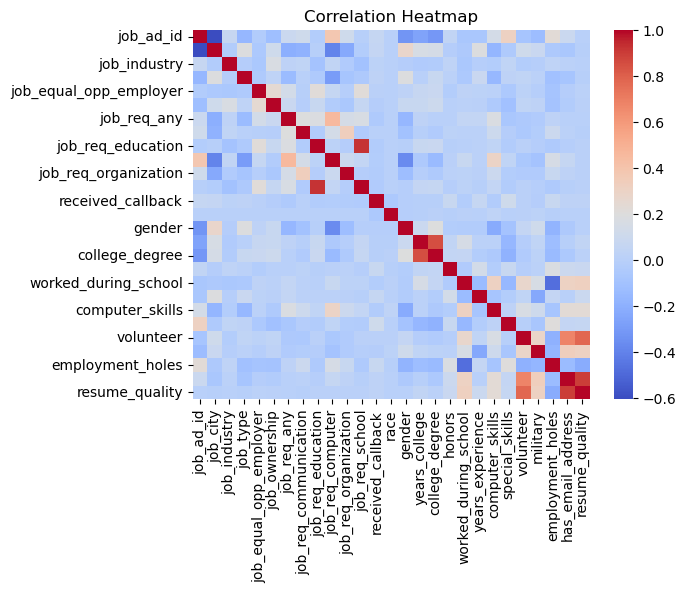

<Figure size 1000x1000 with 0 Axes>

In [67]:
corr_data = data.drop(["firstname"], axis = 1)
corr_data = corr_data.astype(int)
sns.heatmap(corr_data.corr(), annot=False, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.figure(figsize=(10, 10))


job_ad_id
job_city
job_equal_opp_employer
job_req_any
job_req_computer
years_experience
resume_quality
has_email_address
military
volunteer
computer (very less but correlated)
worked during school


### Univariate Analysis for resume quality

In [68]:

# Calculate the value counts of resume_quality
value_counts = pd.Series(data["resume_quality"]).value_counts()

# Create the bar chart
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts)])

# Update the layout
fig.update_layout(
    title='Resume Quality Bar Chart',
    xaxis_title='Resume Quality',
    yaxis_title='Count'
)

# Display the bar chart
fig.show()

# Univariate analysis for has email_address

In [69]:

value_counts = pd.Series(data["has_email_address"]).value_counts()

# Create the bar chart
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts)])

# Update the layout
fig.update_layout(
    title='Has Email Address Bar Chart',
    xaxis_title='Has Email Address',
    yaxis_title='Count'
)

# Display the bar chart
fig.show()

# Univariate analysis for employment holes

In [70]:


value_counts = pd.Series(data["employment_holes"]).value_counts()

fig = go.Figure(data=go.Bar(x=value_counts.index, y=value_counts))

# Update the layout
fig.update_layout(
    title='Bivariate Scatter Plot',
    xaxis_title='X',
    yaxis_title='Y'
)

# Display the scatter plot
fig.show()

# Analysis for Job_City

In [71]:
value_counts = pd.Series(data["job_city"]).value_counts()

# Create the bar chart
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts)])

# Update the layout
fig.update_layout(
    title='Job City Bar Chart',
    xaxis_title='Job City',
    yaxis_title='Count'
)

# Display the bar chart
fig.show()

# Analysis for Job_industry

In [72]:
value_counts = pd.Series(data["job_industry"]).value_counts()

# Create the bar chart
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts)])

# Update the layout
fig.update_layout(
    title='Job Industry Bar Chart',
    xaxis_title='Job Industry',
    yaxis_title='Count'
)

# Display the bar chart
fig.show()

# Analysis for Resume Quality

In [73]:
value_counts = pd.Series(data["resume_quality"]).value_counts()

# Create the bar chart
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts)])

# Update the layout
fig.update_layout(
    title='Resume Quality Bar Chart',
    xaxis_title='Resume Quality',
    yaxis_title='Count'
)

# Display the bar chart
fig.show()

# Call-back Rates

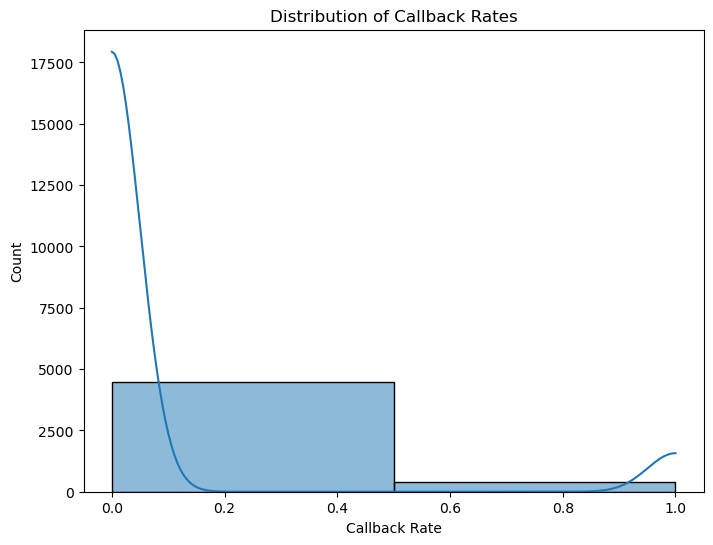

In [74]:


plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='received_callback', bins=2, kde=True)
plt.xlabel('Callback Rate')
plt.ylabel('Count')
plt.title('Distribution of Callback Rates')
plt.show()

# Callback Rates by Race and Gender

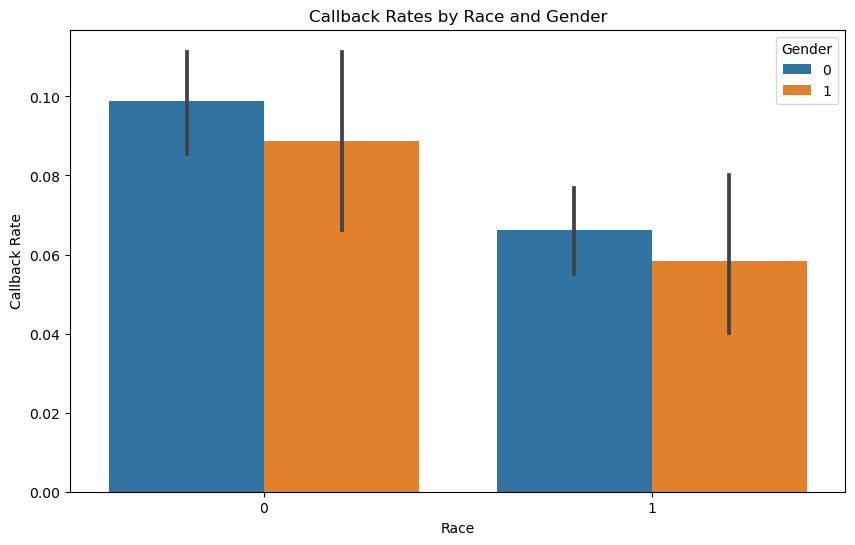

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='race', y='received_callback', hue='gender')
plt.xlabel('Race')
plt.ylabel('Callback Rate')
plt.title('Callback Rates by Race and Gender')
plt.legend(title='Gender')
plt.show()

# Callback Rates by City and Industry

In [76]:
# Create callback_stats DataFrame
callback_stats = data.groupby(['job_city', 'job_industry'])['received_callback'].mean().reset_index()

# Create Table
fig = go.Figure(data=go.Table(
    header=dict(values=['City', 'Industry', 'Callback Rate'],
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[callback_stats['job_city'], callback_stats['job_industry'], callback_stats['received_callback']],
               fill_color='white',
               align='left')
))

# Update layout
fig.update_layout(title='Callback Rate Statistics by City and Industry')

# Show the table
fig.show()


In [77]:
y = corr_data['resume_quality']
X= corr_data.drop(['resume_quality'], axis=1)

# Train-test Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X.dtypes

job_ad_id                 int64
job_city                  int64
job_industry              int64
job_type                  int64
job_equal_opp_employer    int64
job_ownership             int64
job_req_any               int64
job_req_communication     int64
job_req_education         int64
job_req_computer          int64
job_req_organization      int64
job_req_school            int64
received_callback         int64
race                      int64
gender                    int64
years_college             int64
college_degree            int64
honors                    int64
worked_during_school      int64
years_experience          int64
computer_skills           int64
special_skills            int64
volunteer                 int64
military                  int64
employment_holes          int64
has_email_address         int64
dtype: object

In [ ]:
Trying various algorithms

# Logistic Regression

In [80]:
#performing logistic regression
log_reg = LogisticRegression( solver = 'newton-cg', random_state = 42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9804928131416838

# SVM

In [81]:
#performing SVM
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6683778234086243

# KNN

In [82]:
#performing KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.5749486652977412

# Random Forest

In [83]:
#performing Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.973305954825462

# Decision Tree Using Grid Search CV

In [85]:
#performing Decision Tree using Grid Search CV
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("\nTest accuracy:", accuracy)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}

Test accuracy: 0.9815195071868583
